<a href="https://colab.research.google.com/github/ajitjadhav10/UMBC/blob/main/DATA%20602/Data_602_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data 602 Homework | Week 2

- Topic: Testing Hypothesis in Python


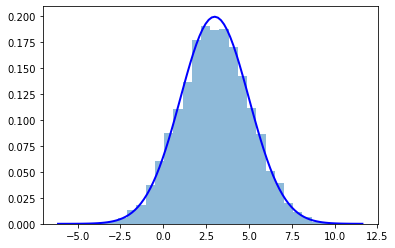

In [16]:
# Generate a normally distributed data, with mean=3 and standard deviation=2, for 10,000 observations:

import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
from scipy import stats
import scipy

mu, sigma = 3, 2
s = np.random.normal(mu, sigma,10000)
plt.hist(s,bins=30, density=True, alpha=0.5)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
  
plt.plot(x, p, linewidth=2,color='b')  

plt.show()

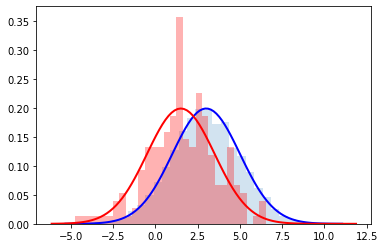

In [17]:
## Comparing the two normal distributions

mu, sigma = 3, 2
s = np.random.normal(mu, sigma,10000)
count, bins, ignored = plt.hist(s, 30, alpha=0.2, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
  
plt.plot(x, p, linewidth=2,color='b')  

# Create a sub-sample of this population with mean of 1.5, a sigma of 2.0, and 200 observations.
sample_mean, sample_sigma = 1.5, 2
sample = np.random.normal(sample_mean, sample_sigma, 200)
plt.hist(sample,bins=30, density=True, alpha=0.3,color='r')
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin1, xmax1, 100)
p1= norm.pdf(x1, sample_mean, sample_sigma)
  
plt.plot(x1, p1,linewidth=2,color='r')  

plt.show()



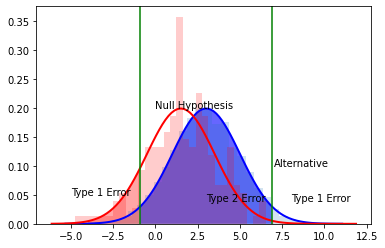

In [21]:
# Use ‘from scipy.stats import norm’ to create 95% confidence intervals. Consider the interval as
# plt.axvline(ci[0],color='g')
# plt.axvline(ci[1],color='g')
# Create a graph that shows the null hypotheses & the type 1 and 2 errors

plt.hist(s, 30, alpha=0.2, density=True) #plotting the histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

plt.plot(x, p, linewidth=2,color='b') #plotting the normal distribution


plt.hist(sample, 30, alpha=0.2, color='r',density=True) #plotting the histogram
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin1, xmax1, 100)
p1= norm.pdf(x1, sample_mean, sample_sigma)

plt.plot(x1, p1,linewidth=2,color='r') #plotting the normal distribution



ci = stats.norm.interval(0.95, mu, sigma)
plt.axvline(ci[0],color='g')
plt.axvline(ci[1],color='g')

plt.fill_between(x=np.arange(ci[0],ci[1],0.05), 
                 y1= scipy.stats.norm.pdf(np.arange(ci[0],ci[1],0.05),mu,sigma),
                 facecolor='blue',
                 alpha=0.6)

plt.fill_between(x=np.arange(-4,ci[0],0.05), 
                 y1= scipy.stats.norm.pdf(np.arange(-4,ci[0],0.05),sample_mean,sample_sigma) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(ci[1],7.0,0.05), 
                 y1= scipy.stats.norm.pdf(np.arange(ci[1],7.0,0.05),sample_mean,sample_sigma) ,
                 facecolor='red',
                 alpha=0.6)

plt.text(x=-5, y=0.05, s= "Type 1 Error")
plt.text(x=8, y=0.04, s= "Type 1 Error")
plt.text(x=3, y=0.04, s= "Type 2 Error")
plt.text(x=0, y=0.20, s= "Null Hypothesis")
plt.text(x=7, y=0.10, s= "Alternative")


plt.show()

In [22]:
# Compute the z-score, which is equal to (sample mean – mu)/sigma. What is the p-value and do you reject it?

zscore=(sample_mean-mu)/sigma
pvalue = scipy.stats.norm.sf(abs(zscore))

print('The p-value is',pvalue)
print("The z score is",zscore)

if pvalue<0.05:
    print('P value<Alpha. Hence, we reject H0')
else:
    print('P value>Alpha. Hence, we do not reject H0')

The p-value is 0.2266273523768682
The z score is -0.75
P value>Alpha. Hence, we do not reject H0
